In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np

In [4]:
# Functions we'll use

def fetch_image_data(image_path: str, 
                     show_image: bool = True) -> np.ndarray:
    """
    Reads an image file from the given path using Pillow, and returns it as a NumPy array.
    Optionally, displays the image using Matplotlib.

    Args:
        image_path (str): Path to the image file.
        show_image (bool): Whether to display the image using Matplotlib. Default is True.

    Returns:
        np.ndarray: A NumPy array representing the image.

    Raises:
        FileNotFoundError: If the specified image file does not exist.
        ValueError: If the specified image file is not a valid image file or could not be read.

    """

    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"{image_path} not found")
    try:
        with Image.open(image_path) as image:
            example_image = plt.imread(image_path)
            if show_image:
                plt.figure()
                plt.imshow(example_image)
                plt.title('Image display of: ' + image_path)
            return example_image
    except Exception as e:
        raise ValueError(f"Could not read {image_path}: {str(e)}")


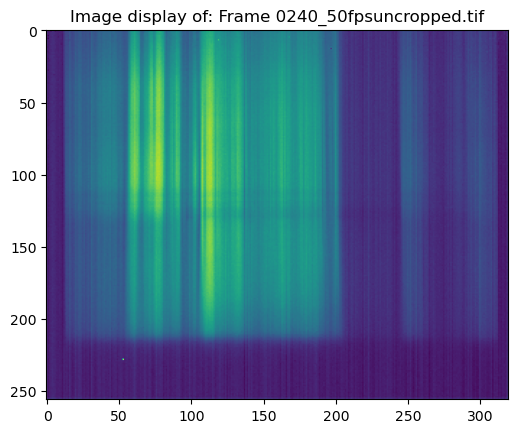

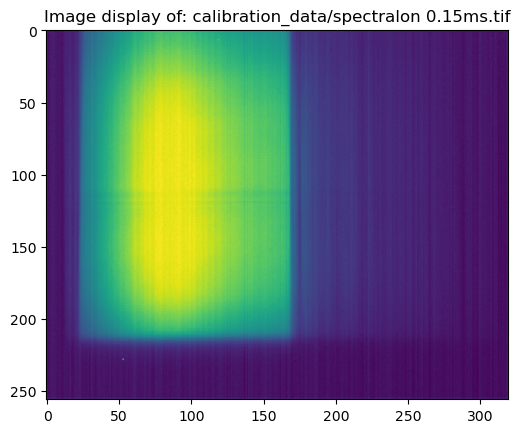

In [5]:
# Collect and display all the image data we're currently interested in 
curr_image = fetch_image_data('Frame 0240_50fpsuncropped.tif')
# curr_image = fetch_image_data('hvc 2197.tif')

white_ref = fetch_image_data('calibration_data/spectralon 0.15ms.tif')

In [78]:
# Let's make a 5, 20, 80, and 99

ref_5 = (white_ref * 0.05).astype('uint16')
ref_20 = (white_ref * 0.2).astype('uint16')
ref_80 = (white_ref * 0.8).astype('uint16')
ref_99 = (white_ref * 0.99).astype('uint16')

# plt.imsave('ref_5.png', ref_5, format = 'tif')
# plt.imsave('ref_20.png', ref_20, format = 'png')
# plt.imsave('ref_80.png', ref_80, format = 'png')
# plt.imsave('ref_99.png', ref_99, format = 'png')

# Serialize these as native arrays and we'll allow
# the calibration pipeline to read either images 
# or arrays but will make sure data type remains constant
# (Uint16)

# ref_5.tofile('ref_5.npy')
# ref_20.tofile('ref_20.npy')
# ref_80.tofile('ref_80.npy')
# ref_99.tofile('ref_99.npy')
import pickle
curr_filename = "ref_5.pickle"
with open(curr_filename, 'wb') as f:
    pickle.dump(ref_5, f)
curr_filename = "ref_20.pickle"
with open(curr_filename, 'wb') as f:
    pickle.dump(ref_20, f)
curr_filename = "ref_80.pickle"
with open(curr_filename, 'wb') as f:
    pickle.dump(ref_80, f)
curr_filename = "ref_99.pickle"
with open(curr_filename, 'wb') as f:
    pickle.dump(ref_99, f)

# import PIL
# # PIL.
# # import cv3
# # !pip install opencv-python
# import cv2
# cv2.imwrite('test.tif', ref_5)


True

In [90]:
# np.load("ref_5.pickle", allow_pickle=True) == ref_5
'ref_5.pickle'.split('.')[-1]
# quicktest = cv2.imread('test.tif')

# quicktest = plt.imread('test.tif')

'pickle'

In [70]:
# ref_5[200,100], ref_20[200,100], ref_80[200,100], ref_99[200,100]
# test_im = Image.open("Frame 0240_50fpsuncropped.tif")
# plt.imread("calibration_data/spectralon 0.15ms.tif")



array([[5331, 4850, 4824, ..., 4648, 4642, 5530],
       [5146, 4309, 4481, ..., 4756, 4200, 4911],
       [5143, 4324, 4510, ..., 4602, 4271, 4868],
       ...,
       [4894, 4098, 4416, ..., 4132, 4090, 4622],
       [4889, 4104, 4301, ..., 4240, 4162, 4815],
       [5464, 4552, 4720, ..., 4477, 4569, 5132]], dtype=uint16)